In [1]:
from keras.datasets import imdb
from sklearn.metrics import accuracy_score

import numpy as np # linear algebra
import pandas as pd # data processing, 



In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# preprocessing 


In [3]:
# change the data into vectors

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # all zero matrix of shape (len(sequences), dimension)
    result = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:

train_data.size,x_train.size, train_labels.size, x_train.shape

(25000, 250000000, 25000, (25000, 10000))

In [6]:
from keras import models
from keras import layers

model  = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## compiler et entrainer le modele avec une partie du jeu d'entrainement 

In [8]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 8s 222ms/step - loss: 0.5411 - acc: 0.7561 - val_loss: 0.4167 - val_acc: 0.8359
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3216 - acc: 0.8903 - val_loss: 0.3107 - val_acc: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2355 - acc: 0.9180 - val_loss: 0.2974 - val_acc: 0.8788
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1839 - acc: 0.9375 - val_loss: 0.2774 - val_acc: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1474 - acc: 0.9507 - val_loss: 0.3800 - val_acc: 0.8554
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1264 - acc: 0.9591 - val_loss: 0.2972 - val_acc: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1068 - acc: 0.9649 - val_loss: 0.3277 - val_acc: 0.8780
Epoch 8/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0880 - 

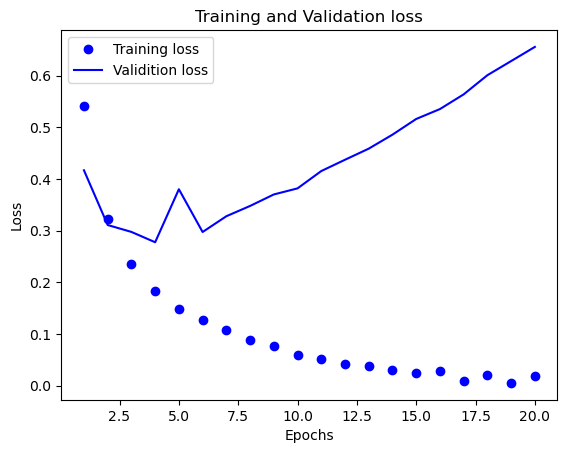

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']

acc = history_dict['acc']
epochs = range(1,len(acc) + 1)


plt.plot(epochs,loss_value, 'bo', label='Training loss')
plt.plot(epochs,val_loss_value, 'b', label='Validition loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

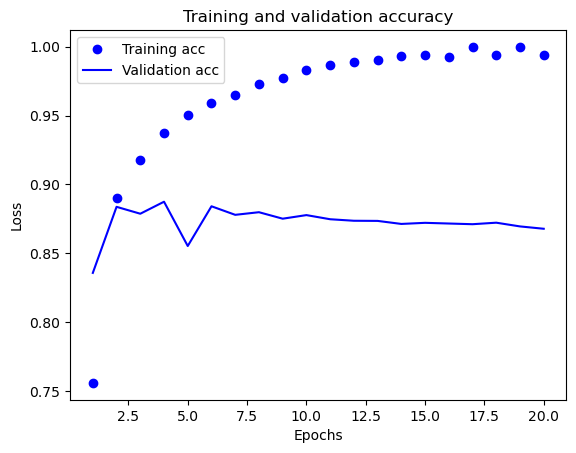

In [10]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 4s 25ms/step - loss: 0.4581 - accuracy: 0.8212
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2894 - accuracy: 0.9017
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2337 - accuracy: 0.9192
Epoch 4/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2037 - accuracy: 0.9296


In [12]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 4ms/step - loss: 0.2791 - accuracy: 0.8885


In [13]:
results

[0.27909064292907715, 0.8885200023651123]

# predictions et confusion matrice sr tous les jeux 

In [14]:


# Faire des prédictions sur les ensembles de données
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
y_pred_test = model.predict(x_test)

# Seuil pour la classification binaire
threshold = 0.5

# Convertir les prédictions en classes binaires
y_pred_train_binary = (y_pred_train > threshold).astype(int)
y_pred_val_binary = (y_pred_val > threshold).astype(int)
y_pred_test_binary = (y_pred_test > threshold).astype(int)

# Calcul des métriques
from sklearn.metrics import classification_report, confusion_matrix

print("Métriques sur l'ensemble d'entraînement :")
print(classification_report(y_train, y_pred_train_binary))

print("Métriques sur l'ensemble de validation :")
print(classification_report(y_val, y_pred_val_binary))

print("Métriques sur l'ensemble de test :")
print(classification_report(y_test, y_pred_test_binary))

# Matrices de confusion sur les trois ensembles
confusion_matrix_train = confusion_matrix(y_train, y_pred_train_binary)
confusion_matrix_val = confusion_matrix(y_val, y_pred_val_binary)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test_binary)

print("Matrice de confusion sur l'ensemble d'entraînement :")
print(confusion_matrix_train)

print("Matrice de confusion sur l'ensemble de validation :")
print(confusion_matrix_val)

print("Matrice de confusion sur l'ensemble de test :")
print(confusion_matrix_test)


782/782 [==============================] - 3s 4ms/step
Métriques sur l'ensemble d'entraînement :
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94     12500
         1.0       0.92      0.96      0.94     12500

    accuracy                           0.94     25000
   macro avg       0.94      0.94      0.94     25000
weighted avg       0.94      0.94      0.94     25000

Métriques sur l'ensemble de validation :
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      4947
         1.0       0.93      0.96      0.94      5053

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Métriques sur l'ensemble de test :
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89     12500
         1.0       0.87      0.91      0.89     12500

    accur

# Autres modeles 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from keras.datasets import imdb

(train_samples, train_labels), (test_samples, test_labels) = imdb.load_data(num_words=10000)

# Afficher la forme des données d'entraînement et de test
print("Train samples shape:", train_samples.shape)
print("Train labels shape:", train_labels.shape)
print("Test samples shape:", test_samples.shape)
print("Test labels shape:", test_labels.shape)

# Afficher les premières séquences d'exemple dans les données
print("Première séquence d'exemple dans les données d'entraînement:")
print(test_samples[0])

# Afficher les premières étiquettes d'exemple dans les données
print("Première étiquette d'exemple dans les données d'entraînement:")
print(train_labels[1])

#creer un jeu de validation a partie du jeu de train
# Diviser les données d'entraînement en données d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(train_samples, train_labels, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_val.shape  , y_val.shape  , test_samples.shape, test_labels.shape

#encoder les donnees numeriques car elles ne sont pas sous formes 0 1

import numpy as np


# Nombre maximum de mots (vocabulaire)
max_words = 10000

# Fonction pour effectuer l'encodage One-Hot
def one_hot_encoding(sequences, dimension=max_words):
    results = np.zeros((len(sequences), dimension), dtype=int)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Encodage One-Hot des données d'entraînement et de test
X_train_one_hot = one_hot_encoding(X_train)
X_val_one_hot = one_hot_encoding(X_val)
X_test_one_hot = one_hot_encoding(test_samples)

# Les données d'entraînement et de test sont maintenant en format One-Hot
print("Train data One-Hot shape:", X_train_one_hot.shape)
print("val data One-Hot shape:", X_val_one_hot.shape)
print("Test data One-Hot shape:", X_test_one_hot.shape)


# Entrainer le modele

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

# Créez un modèle de régression logistique
logistic_model = LogisticRegression()
# Entraînez le modèle sur les données d'entraînement encodées au format One-Hot
logistic_model.fit(X_train_one_hot, y_train)

# Prédisez les étiquettes sur l'ensemble de validation
y_val_pred_logistic = logistic_model.predict(X_val_one_hot)

# Évaluez les performances du modèle de régression logistique
accuracy_logistic = accuracy_score(y_val, y_val_pred_logistic)
print("Accuracy (Logistic Regression) on Validation Set:", accuracy_logistic)
print(classification_report(y_val, y_val_pred_logistic))


accuracy_logistic = accuracy_score(y_train, logistic_model.predict(X_train_one_hot))
print("Accuracy (Logistic Regression) on Train Set:", accuracy_logistic)
print(classification_report(y_train, logistic_model.predict(X_train_one_hot)))

accuracy_logistic = accuracy_score(test_labels, logistic_model.predict(X_test_one_hot))
print("Accuracy (Logistic Regression) on Test Set:", accuracy_logistic)
print(classification_report(test_labels, logistic_model.predict(X_test_one_hot)))


# Matrice de confusion logistic regression

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
​
# Matrice de confusion pour la régression logistique
confusion_matrix_logistic = confusion_matrix(y_val, y_val_pred_logistic)
​
​
# Matrice de confusion pour la régression logistique sur l'ensemble d'entraînement
confusion_matrix_train_logistic = confusion_matrix(y_train, logistic_model.predict(X_train_one_hot))
​
​
# Matrice de confusion pour la régression logistique sur l'ensemble de test
confusion_matrix_test_logistic = confusion_matrix(test_labels, logistic_model.predict(X_test_one_hot))
​
​
# Fonction pour afficher une matrice de confusion avec des étiquettes
def plot_confusion_matrix(confusion_matrix, title):
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies étiquettes")
    plt.title(title)
    plt.show()
​
# Affichage des matrices de confusion pour la régression logistique
plot_confusion_matrix(confusion_matrix_train_logistic, "Matrice de Confusion (Régression Logistique - Entraînement)")
plot_confusion_matrix(confusion_matrix_logistic, "Matrice de Confusion (Régression Logistique - Validation)")
plot_confusion_matrix(confusion_matrix_test_logistic, "Matrice de Confusion (Régression Logistique - Test)")

# SVM

In [ ]:
from keras.datasets import imdb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC


(train_samples, train_labels), (test_samples, test_labels) = imdb.load_data(num_words=10000)


import numpy as np
# Diviser les données d'entraînement en données d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(train_samples, train_labels, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_val.shape  , y_val.shape  , test_samples.shape, test_labels.shape 

# Nombre maximum de mots (vocabulaire)
max_words = 10000

# Fonction pour effectuer l'encodage One-Hot
def one_hot_encoding(sequences, dimension=max_words):
    results = np.zeros((len(sequences), dimension), dtype=int)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Encodage One-Hot des données d'entraînement et de test
X_train_one_hot = one_hot_encoding(X_train)
X_val_one_hot = one_hot_encoding(X_val)
X_test_one_hot = one_hot_encoding(test_samples)

# Les données d'entraînement et de test sont maintenant en format One-Hot
print("Train data One-Hot shape:", X_train_one_hot.shape)
print("val data One-Hot shape:", X_val_one_hot.shape)
print("Test data One-Hot shape:", X_test_one_hot.shape)



# Créez une instance de SVM linéaire
svm_model = SVC(kernel='linear')


# Entraînez le modèle sur l'ensemble d'entraînement encodé en one-hot
svm_model.fit(X_train_one_hot, y_train)

# Prédisez les étiquettes de l'ensemble de validation
y_val_pred_svm = svm_model.predict(X_val_one_hot)

# Évaluez les performances sur l'ensemble de validation
accuracy_val_svm = accuracy_score(y_val, y_val_pred_svm)
print("Accuracy on Validation Set (SVM):", accuracy_val_svm)


Train data One-Hot shape: (20000, 10000)
val data One-Hot shape: (5000, 10000)
Test data One-Hot shape: (25000, 10000)
